In [ ]:
!pip install polars

In [ ]:
import polars as pl
import numpy as np
import os
from google.colab import drive # this is crucial if you want to use data from your google drive
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.image import imread
import seaborn as sns

In [ ]:
pl.Config.set_tbl_rows(20)

polars.config.Config

In [ ]:
drive.mount('/content/drive')
## edit based on your folder and file location
df = pl.read_csv('/content/drive/MyDrive/Electronic_sales_Sep2023-Sep2024.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64
1000,53,"""Male""","""No""","""Smartphone""","""SKU1004""",2,"""Cancelled""","""Credit Card""",5538.33,791.19,7,"""2024-03-20""","""Standard""","""Accessory,Accessory,Accessory""",40.21
1000,53,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",741.09,247.03,3,"""2024-04-20""","""Overnight""","""Impulse Item""",26.09
1002,41,"""Male""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Credit Card""",1855.84,463.96,4,"""2023-10-17""","""Express""",null,0.0
1002,41,"""Male""","""Yes""","""Smartphone""","""SKU1004""",2,"""Completed""","""Cash""",3164.76,791.19,4,"""2024-08-09""","""Overnight""","""Impulse Item,Impulse Item""",60.16
1003,75,"""Male""","""Yes""","""Smartphone""","""SKU1001""",5,"""Completed""","""Cash""",41.5,20.75,2,"""2024-05-21""","""Express""","""Accessory""",35.56
1004,41,"""Female""","""No""","""Smartphone""","""SKU1001""",5,"""Completed""","""Credit Card""",83.0,20.75,4,"""2024-05-26""","""Standard""","""Impulse Item,Accessory""",65.78
1005,25,"""Female""","""No""","""Smartwatch""","""SKU1003""",3,"""Completed""","""Paypal""",7603.47,844.83,9,"""2024-01-30""","""Overnight""",null,0.0
1005,25,"""Female""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Debit Card""",4175.64,463.96,9,"""2024-06-24""","""Overnight""","""Extended Warranty,Extended War…",75.33
1006,24,"""Male""","""No""","""Smartphone""","""SKU1004""",2,"""Cancelled""","""Debit Card""",5538.33,791.19,7,"""2023-10-03""","""Standard""","""Impulse Item""",43.05


In [ ]:
# Find duplicate rows
duplicates = df.filter(df.is_duplicated())

print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
shape: (0, 16)
┌─────────────┬─────┬────────┬─────────┬───┬──────────┬──────────┬───────────┬──────────────┐
│ Customer ID ┆ Age ┆ Gender ┆ Loyalty ┆ … ┆ Purchase ┆ Shipping ┆ Add-ons   ┆ Add-on Total │
│ ---         ┆ --- ┆ ---    ┆ Member  ┆   ┆ Date     ┆ Type     ┆ Purchased ┆ ---          │
│ i64         ┆ i64 ┆ str    ┆ ---     ┆   ┆ ---      ┆ ---      ┆ ---       ┆ f64          │
│             ┆     ┆        ┆ str     ┆   ┆ str      ┆ str      ┆ str       ┆              │
╞═════════════╪═════╪════════╪═════════╪═══╪══════════╪══════════╪═══════════╪══════════════╡
└─────────────┴─────┴────────┴─────────┴───┴──────────┴──────────┴───────────┴──────────────┘


In [ ]:
df = df.unique()

In [ ]:
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64
2924,41,"""Female""","""No""","""Smartwatch""","""SKU1003""",3,"""Cancelled""","""Cash""",5913.81,844.83,7,"""2024-07-20""","""Express""",null,0.0
2894,61,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",1482.18,247.03,6,"""2023-12-07""","""Express""","""Impulse Item,Accessory,Extende…",100.31
4192,36,"""Female""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Debit Card""",3247.72,463.96,7,"""2023-12-28""","""Overnight""","""Accessory""",24.12
11964,45,"""Female""","""No""","""Smartphone""","""SMP234""",5,"""Completed""","""Bank Transfer""",3419.04,1139.68,3,"""2024-01-15""","""Expedited""","""Accessory""",53.33
17193,27,"""Male""","""Yes""","""Laptop""","""LTP123""",3,"""Cancelled""","""PayPal""",4045.92,674.32,6,"""2024-07-16""","""Same Day""","""Extended Warranty""",77.05
16154,40,"""Female""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",459.5,459.5,1,"""2024-03-20""","""Standard""","""Accessory""",60.29
16755,46,"""Male""","""Yes""","""Smartphone""","""SMP234""",2,"""Completed""","""Credit Card""",2279.36,1139.68,2,"""2024-01-29""","""Same Day""","""Impulse Item, Impulse Item, Ac…",116.2
18651,28,"""Male""","""No""","""Headphones""","""HDP456""",5,"""Completed""","""Bank Transfer""",1444.72,361.18,4,"""2024-08-23""","""Same Day""","""Accessory, Impulse Item""",112.71
15998,37,"""Male""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",2297.5,459.5,5,"""2024-04-28""","""Expedited""","""Accessory""",52.04


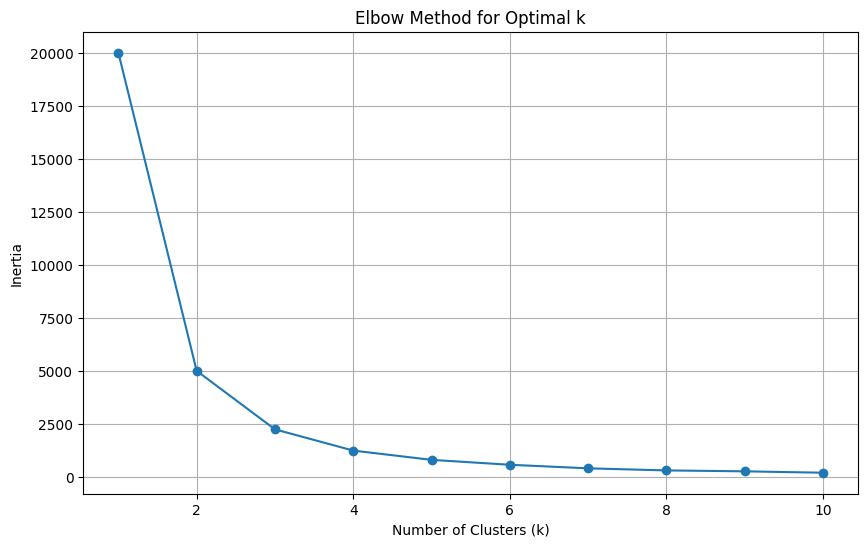

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting numerical features for clustering
features = ['Age']

# Extracting the relevant features
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [ ]:
!pip install polars kneed

The optimal number of clusters according to the Kneedle algorithm is: 5


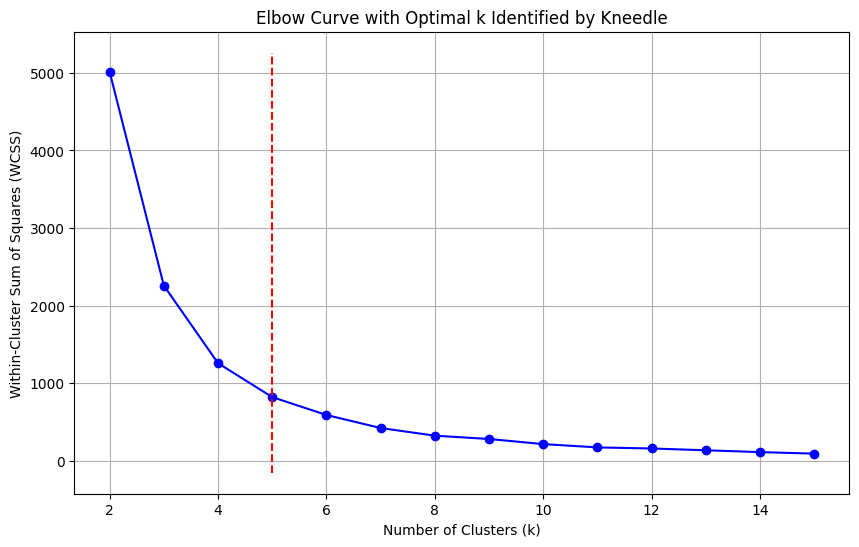

In [ ]:
from kneed import KneeLocator

# Calculating WCSS for different values of k (from 2 to 15)
wcss = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is equivalent to WCSS

# Using the Kneedle algorithm to determine the optimal k
kneedle = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.knee

print(f"The optimal number of clusters according to the Kneedle algorithm is: {optimal_k}")

# Visualize the elbow with Kneedle
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve with Optimal k Identified by Kneedle')
plt.grid(True)
plt.show()

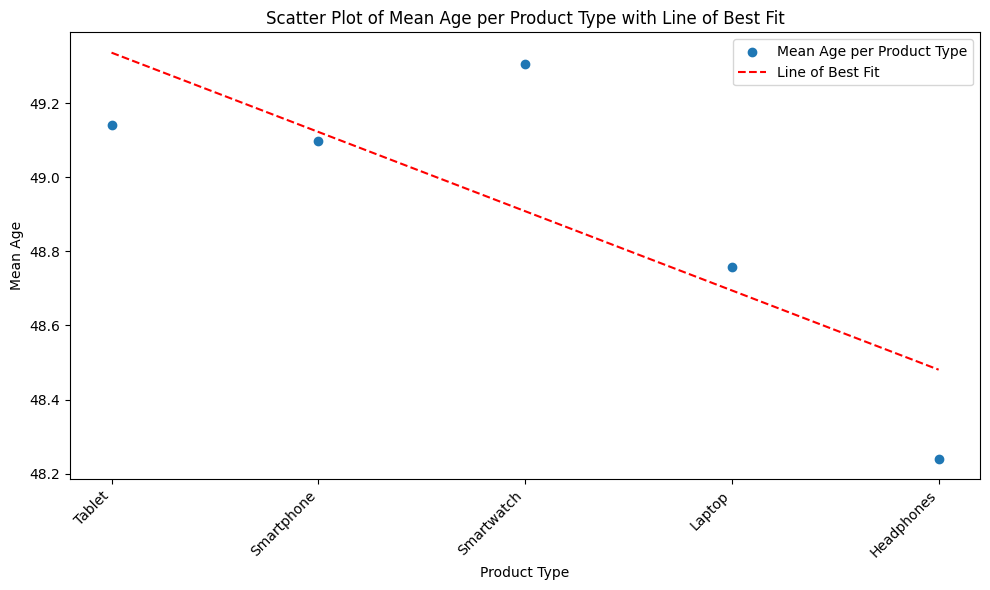

In [ ]:
# prompt: How can I draw a scatter plot with a line of best fit involving the two variables of 'Age' (clustered) and 'Product Type'

import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your Polars DataFrame with 'Age', 'Product Type', and 'cluster' columns

# Group data by 'Product Type' and calculate the mean age for each product type
product_age_means = df.group_by('Product Type').agg(pl.mean('Age'))

# Extract the product types and mean ages
product_types = product_age_means['Product Type'].to_list()
mean_ages = product_age_means['Age'].to_list()

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(product_types, mean_ages, label='Mean Age per Product Type')

# Calculate the line of best fit
z = np.polyfit(range(len(mean_ages)), mean_ages, 1)
p = np.poly1d(z)

# Plot the line of best fit
plt.plot(product_types, p(range(len(mean_ages))), "r--", label='Line of Best Fit')


plt.xlabel('Product Type')
plt.ylabel('Mean Age')
plt.title('Scatter Plot of Mean Age per Product Type with Line of Best Fit')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [ ]:
# Create the age group column
df = df.with_columns(
    pl.when(pl.col("Age") < 20)
    .then(1)
    .when((pl.col("Age") >= 20) & (pl.col("Age") < 30))
    .then(2)
    .when((pl.col("Age") >= 30) & (pl.col("Age") < 40))
    .then(3)
    .when((pl.col("Age") >= 40) & (pl.col("Age") < 50))
    .then(4)
    .when((pl.col("Age") >= 50) & (pl.col("Age") < 60))
    .then(5)
    .otherwise(6)
    .alias("Age Group")
)

In [ ]:
len(list(df['Customer ID'].unique()))

12136

In [ ]:
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64,i32
2924,41,"""Female""","""No""","""Smartwatch""","""SKU1003""",3,"""Cancelled""","""Cash""",5913.81,844.83,7,"""2024-07-20""","""Express""",null,0.0,4
2894,61,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",1482.18,247.03,6,"""2023-12-07""","""Express""","""Impulse Item,Accessory,Extende…",100.31,6
4192,36,"""Female""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Debit Card""",3247.72,463.96,7,"""2023-12-28""","""Overnight""","""Accessory""",24.12,3
11964,45,"""Female""","""No""","""Smartphone""","""SMP234""",5,"""Completed""","""Bank Transfer""",3419.04,1139.68,3,"""2024-01-15""","""Expedited""","""Accessory""",53.33,4
17193,27,"""Male""","""Yes""","""Laptop""","""LTP123""",3,"""Cancelled""","""PayPal""",4045.92,674.32,6,"""2024-07-16""","""Same Day""","""Extended Warranty""",77.05,2
16154,40,"""Female""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",459.5,459.5,1,"""2024-03-20""","""Standard""","""Accessory""",60.29,4
16755,46,"""Male""","""Yes""","""Smartphone""","""SMP234""",2,"""Completed""","""Credit Card""",2279.36,1139.68,2,"""2024-01-29""","""Same Day""","""Impulse Item, Impulse Item, Ac…",116.2,4
18651,28,"""Male""","""No""","""Headphones""","""HDP456""",5,"""Completed""","""Bank Transfer""",1444.72,361.18,4,"""2024-08-23""","""Same Day""","""Accessory, Impulse Item""",112.71,2
15998,37,"""Male""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",2297.5,459.5,5,"""2024-04-28""","""Expedited""","""Accessory""",52.04,3


<ipython-input-19-8b1c5bd48213>:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  age_product_counts = df.group_by(["Age Group", "Product Type"]).count()


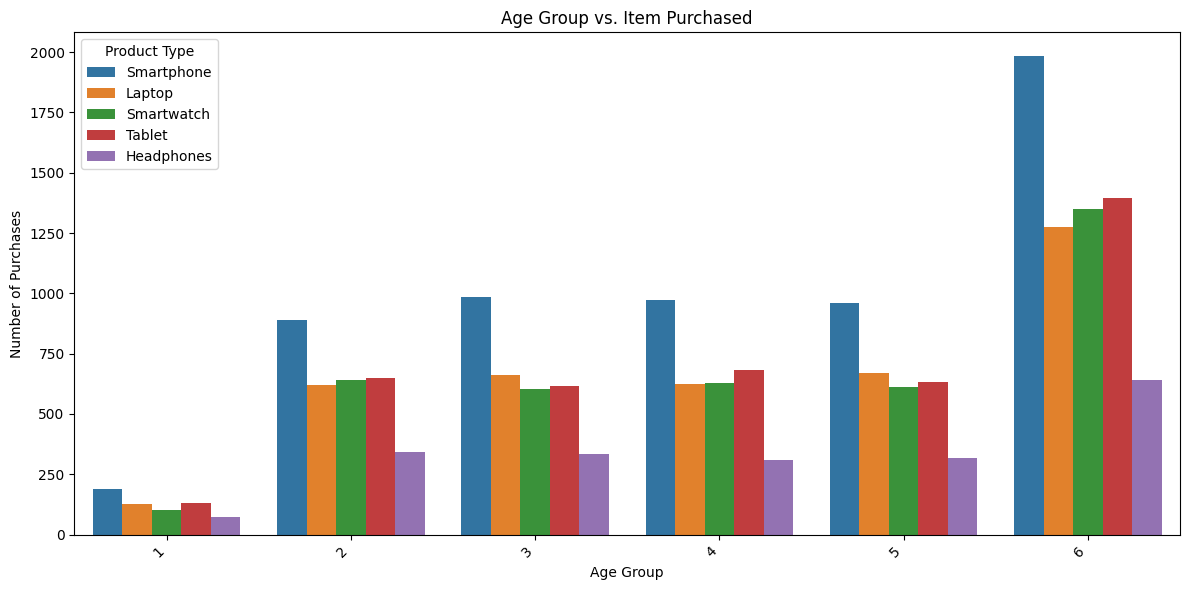

In [ ]:
# prompt: Represent the age clusters and item purchased as a bar graph

# Group the data by age group and product type, then count the occurrences
age_product_counts = df.group_by(["Age Group", "Product Type"]).count()

# Convert the Polars DataFrame to a Pandas DataFrame for easier plotting with matplotlib
age_product_counts_pd = age_product_counts.to_pandas()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Age Group", y="count", hue="Product Type", data=age_product_counts_pd)
plt.xlabel("Age Group")
plt.ylabel("Number of Purchases")
plt.title("Age Group vs. Item Purchased")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
df = df.with_columns(
    pl.when(pl.col("Total Price") > 1000)
    .then(1)
    .otherwise(0)
    .alias("High Value")
)

In [ ]:
df['Total Price','High Value'].head(20)

Total Price,High Value
f64,i32
5913.81,1
1482.18,1
3247.72,1
3419.04,1
4045.92,1
459.5,0
2279.36,1
1444.72,1
2297.5,1


In [ ]:
# prompt: Display the customers who purchased multiple times (same customer ID in multiple rows)

# Assuming 'df' is your Polars DataFrame
customer_purchase_counts = df.group_by("Customer ID").count()
multiple_purchases = customer_purchase_counts.filter(pl.col("count") >= 1)
multiple_purchases.sort("count", descending=True)

<ipython-input-22-759287c6b59e>:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  customer_purchase_counts = df.group_by("Customer ID").count()


Customer ID,count
i64,u32
18304,8
16357,7
2556,6
12276,6
19996,6
12616,6
14497,6
13230,6
4192,6


In [ ]:
# prompt: Make a new column Product Number in df with each product type being a different number. Use python polars instead of pandas.
product_mapping = {product_type: i + 1 for i, product_type in enumerate(df['Product Type'].unique())}
df = df.with_columns(pl.col("Product Type").replace(product_mapping).alias("Product Number"))

In [ ]:
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group,High Value,Product Number
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64,i32,i32,str
2924,41,"""Female""","""No""","""Smartwatch""","""SKU1003""",3,"""Cancelled""","""Cash""",5913.81,844.83,7,"""2024-07-20""","""Express""",null,0.0,4,1,"""4"""
2894,61,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",1482.18,247.03,6,"""2023-12-07""","""Express""","""Impulse Item,Accessory,Extende…",100.31,6,1,"""5"""
4192,36,"""Female""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Debit Card""",3247.72,463.96,7,"""2023-12-28""","""Overnight""","""Accessory""",24.12,3,1,"""2"""
11964,45,"""Female""","""No""","""Smartphone""","""SMP234""",5,"""Completed""","""Bank Transfer""",3419.04,1139.68,3,"""2024-01-15""","""Expedited""","""Accessory""",53.33,4,1,"""1"""
17193,27,"""Male""","""Yes""","""Laptop""","""LTP123""",3,"""Cancelled""","""PayPal""",4045.92,674.32,6,"""2024-07-16""","""Same Day""","""Extended Warranty""",77.05,2,1,"""2"""
16154,40,"""Female""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",459.5,459.5,1,"""2024-03-20""","""Standard""","""Accessory""",60.29,4,0,"""4"""
16755,46,"""Male""","""Yes""","""Smartphone""","""SMP234""",2,"""Completed""","""Credit Card""",2279.36,1139.68,2,"""2024-01-29""","""Same Day""","""Impulse Item, Impulse Item, Ac…",116.2,4,1,"""1"""
18651,28,"""Male""","""No""","""Headphones""","""HDP456""",5,"""Completed""","""Bank Transfer""",1444.72,361.18,4,"""2024-08-23""","""Same Day""","""Accessory, Impulse Item""",112.71,2,1,"""3"""
15998,37,"""Male""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",2297.5,459.5,5,"""2024-04-28""","""Expedited""","""Accessory""",52.04,3,1,"""4"""


In [ ]:
# prompt: Remove people who cancelled their orders

# Assuming 'df' is your Polars DataFrame and 'Order Status' column indicates cancellations
df = df.filter(pl.col("Order Status") != "Cancelled")
df

Customer ID,Age,Gender,Loyalty Member,Product Type,SKU,Rating,Order Status,Payment Method,Total Price,Unit Price,Quantity,Purchase Date,Shipping Type,Add-ons Purchased,Add-on Total,Age Group,High Value,Product Number
i64,i64,str,str,str,str,i64,str,str,f64,f64,i64,str,str,str,f64,i32,i32,str
2894,61,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Paypal""",1482.18,247.03,6,"""2023-12-07""","""Express""","""Impulse Item,Accessory,Extende…",100.31,6,1,"""5"""
4192,36,"""Female""","""No""","""Laptop""","""SKU1005""",3,"""Completed""","""Debit Card""",3247.72,463.96,7,"""2023-12-28""","""Overnight""","""Accessory""",24.12,3,1,"""2"""
11964,45,"""Female""","""No""","""Smartphone""","""SMP234""",5,"""Completed""","""Bank Transfer""",3419.04,1139.68,3,"""2024-01-15""","""Expedited""","""Accessory""",53.33,4,1,"""1"""
16154,40,"""Female""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",459.5,459.5,1,"""2024-03-20""","""Standard""","""Accessory""",60.29,4,0,"""4"""
16755,46,"""Male""","""Yes""","""Smartphone""","""SMP234""",2,"""Completed""","""Credit Card""",2279.36,1139.68,2,"""2024-01-29""","""Same Day""","""Impulse Item, Impulse Item, Ac…",116.2,4,1,"""1"""
18651,28,"""Male""","""No""","""Headphones""","""HDP456""",5,"""Completed""","""Bank Transfer""",1444.72,361.18,4,"""2024-08-23""","""Same Day""","""Accessory, Impulse Item""",112.71,2,1,"""3"""
15998,37,"""Male""","""No""","""Smartwatch""","""SWT567""",1,"""Completed""","""Bank Transfer""",2297.5,459.5,5,"""2024-04-28""","""Expedited""","""Accessory""",52.04,3,1,"""4"""
4427,18,"""Male""","""Yes""","""Smartphone""","""SKU1001""",5,"""Completed""","""Paypal""",41.5,20.75,2,"""2024-06-01""","""Standard""",null,0.0,1,0,"""1"""
7382,58,"""Male""","""No""","""Tablet""","""SKU1002""",3,"""Completed""","""Debit Card""",988.12,247.03,4,"""2024-04-17""","""Standard""",null,0.0,5,0,"""5"""


In [ ]:
# prompt: Add column "Purchase Count" using the "count" variable above assigned to each Customer ID respectively

# Assuming 'df' is your Polars DataFrame and you have a 'Customer ID' column
customer_purchase_counts = df.group_by("Customer ID").count()

# Rename the 'count' column to 'Purchase Count'
customer_purchase_counts = customer_purchase_counts.rename({"count": "Purchase Count"})

# Join the purchase counts back to the original DataFrame
df = df.join(customer_purchase_counts, on="Customer ID", how="left")

df

<ipython-input-50-3453da0acf3e>:4: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  customer_purchase_counts = df.group_by("Customer ID").count()


DuplicateError: unable to hstack, column with name "Purchase Count_right" already exists

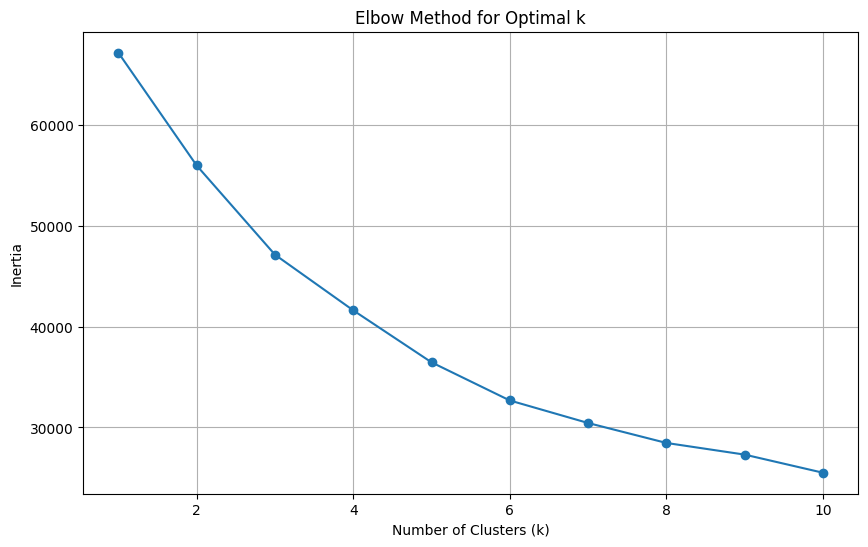

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting numerical features for clustering
features = ['Product Number','Purchase Count','Rating','Total Price','Add-on Total']

# Extracting the relevant features
X = df[features]

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Finding the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


The optimal number of clusters according to the Kneedle algorithm is: 6


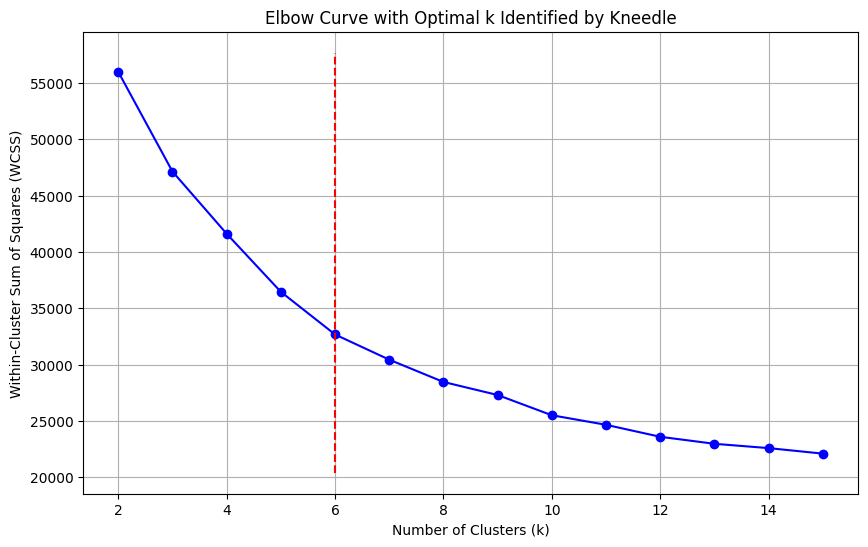

In [ ]:
from kneed import KneeLocator

# Calculating WCSS for different values of k (from 2 to 15)
wcss = []
k_range = range(2, 16)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Inertia is equivalent to WCSS

# Using the Kneedle algorithm to determine the optimal k
kneedle = KneeLocator(k_range, wcss, curve='convex', direction='decreasing')
optimal_k = kneedle.knee

print(f"The optimal number of clusters according to the Kneedle algorithm is: {optimal_k}")

# Visualize the elbow with Kneedle
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o', linestyle='-', color='b')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='r')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Curve with Optimal k Identified by Kneedle')
plt.grid(True)
plt.show()

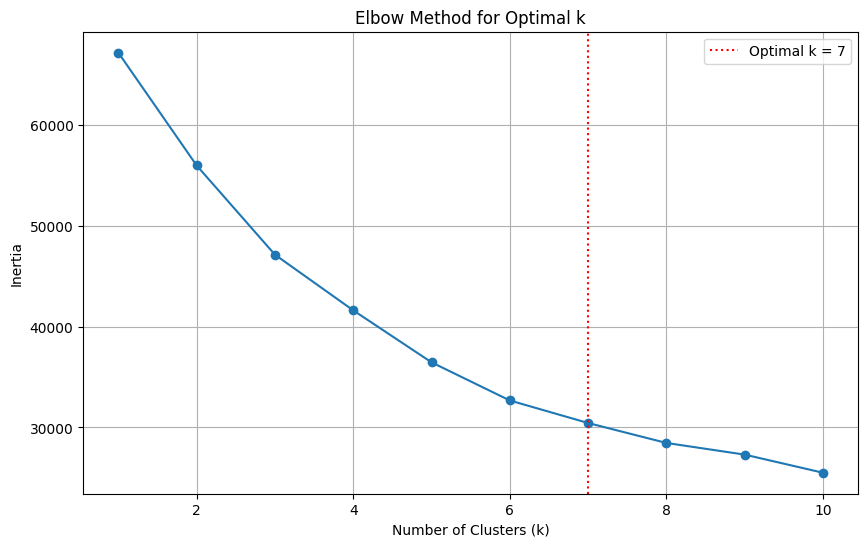

In [ ]:
# prompt: Modify the Elbow Curve to show the optimal k value as 7 with a dotted line

# ... (Your existing code)

# Plotting the Elbow Curve with optimal k highlighted
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)

# Add a dotted line for the optimal k value
plt.axvline(x=7, color='r', linestyle='dotted', label='Optimal k = 7')
plt.legend() #show the label

plt.show()

# ... (Rest of your code)

In [ ]:
# Extracting the relevant features
X = df[features]
X_np = X.to_numpy()

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_np)

# Applying K-Means clustering with k = 7
kmeans = KMeans(n_clusters=7, init = 'random', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Adding the cluster assignments to the original DataFrame
df = df.with_columns(pl.Series(name="cluster", values=clusters))

# Summarizing the number of tracks in each cluster
cluster_summary = df.group_by("cluster").count().sort("cluster")

# Display the cluster summary
cluster_summary

In [ ]:
# Calculate the mean of each feature for each cluster
cluster_means = df.group_by('cluster').agg([pl.mean(col) for col in features])

# Convert cluster means to a dictionary where each key is a cluster and each value is a list of means for the features
cluster_means_dict = {row[0]: row[1:] for row in cluster_means.iter_rows()}

# Radar Chart to visualize the cluster characteristics
def plot_radar_chart(data, features):
    # Number of variables we're plotting
    num_vars = len(features)

    # Compute angle of each axis in the plot
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

    # The plot is a circle, so we need to "complete the loop"
    angles += angles[:1]

    # Create figure
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one line per cluster
    for cluster_id, cluster_values in data.items():
        values = cluster_values
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}')

    # Fix axis to go in the correct direction and start at the top
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each feature + add labels
    ax.set_thetagrids(np.degrees(angles[:-1]), features)

    # Set title and legend
    ax.set_title(f'Cluster Characteristics', size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Plot the radar chart for all clusters
plot_radar_chart(cluster_means_dict, features)

In [ ]:
# prompt: Convert the strings in "Product Number" to numerical values

# Assuming 'df' is your Polars DataFrame and 'Product Number' column needs conversion

# Convert 'Product Number' to numeric, coercing errors to nulls
df = df.with_columns(pl.col("Product Number").cast(pl.Int64, strict=False))

# Now you have numerical values in "Product Number", with invalid values represented as null.
# You can further handle the null values using functions like fill_nan or drop_nulls depending on your needs

df

In [ ]:
cluster_means = df.group_by('cluster').agg([pl.mean(col) for col in features])

# Apply Min-Max Scaling for better visualization
min_values = cluster_means[features].min()
max_values = cluster_means[features].max()

cluster_means_scaled = cluster_means.select(
    [
        pl.col("cluster"),
        *[
            ((pl.col(col) - min_values[col]) / (max_values[col] - min_values[col])).alias(col)
            for col in features
        ]
    ]
)

# Convert scaled means to dictionary for radar plot
cluster_means_dict = {row[0]: row[1:] for row in cluster_means_scaled.iter_rows()}

# Radar Chart
def plot_radar_chart(data, features):
    # Number of variables we're plotting
    num_vars = len(features)

    # Compute angle of each axis in the plot
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    # Create figure
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

    # Draw one line per cluster, sorted by cluster ID for sorted legend
    sorted_data = dict(sorted(data.items()))
    for cluster_id, cluster_values in sorted_data.items():
        values = cluster_values
        values += values[:1]
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=f'Cluster {cluster_id}')

    # Fix axis to go in the correct direction and start at the top
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    # Draw axis lines for each feature + add labels
    ax.set_thetagrids(np.degrees(angles[:-1]), features)

    # Set title and legend
    ax.set_title(f'Cluster Characteristics (Normalized for Visualization)', size=15, color='black', y=1.1)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

    plt.show()

# Plot the radar chart for all clusters
plot_radar_chart(cluster_means_dict, features)

In [ ]:
# Create a 2x4 grid of boxplots for different features
fig, axes = plt.subplots(2, 4, figsize=(20, 12))
axes = axes.flatten()  # Flatten the 2D array of axes

# Plot each feature in a separate subplot
for idx, feature in enumerate(features[:6]):  # Limit to the first 6 features
    sns.boxplot(x='cluster', y=feature, data=df, ax=axes[idx])
    axes[idx].set_title(f'{feature} by Cluster', fontsize=15)

# Adjust layout to prevent overlap and show the plot
plt.tight_layout()
plt.show()